# 2. Text

Nothing tells a story like... text! That might sound weird, but sometimes, it's the only available tool to tell a story. That doesn't mean that you cannot create a rich narrative. Multiplex provides visualizations that automatically organize text-only visualizations, allowing you to focus on annotating it.

This notebook tackles that exact problem: given a paragraph of text, how do you tell a story? In the running example, we have a paragraph of text and we want to annotate it. This can be useful in NLP or data mining tasks, where you'd want to highlight certain information. The case study is [an excerpt from the Wikipedia page of Anthony Lopes](https://en.wikipedia.org/wiki/Anthony_Lopes).

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import nltk
import os
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

In [2]:
paragraph = "Anthony Lopes is a Portuguese professional footballer who plays for \
Olympique Lyonnais as a goalkeeper. He came through the youth ranks at Lyon, being \
called to the first team in 2011 and making his debut the following year."

The simplest case of using a text visualization is to show the tetxt that you are working with. As explained in [1. Getting started](1.%20Getting%20started.ipynb), all visualizations revolve around the Drawable class, and the text annotation visualization is no exception.

The `draw_text_annotation` function lets you draw the text annotation visualization. This function accepts a normal string. We will also pass styling options to make the text stand out. We also justify the text—Multiplex automatically arranges and styles the text on our behalf.

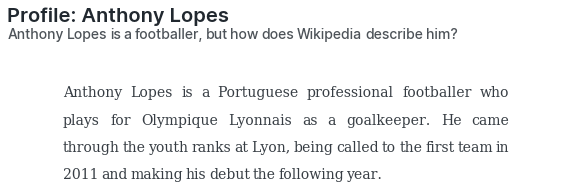

In [3]:
from multiplex import drawable
drawable = importlib.reload(drawable)

plt.style.use(os.path.join(sys.path[0], '..', 'styles', "multiplex.style"))

viz = drawable.Drawable(plt.figure(figsize=(10,2)))

tokens = nltk.word_tokenize(paragraph)
viz.draw_text_annotation(paragraph, align='justify',
                         fontfamily='serif', alpha=0.9,
                         lineheight=1.25, lpad=0.1, rpad=0.1)

viz.set_title('Profile: Anthony Lopes', loc='left')
viz.set_caption('Anthony Lopes is a footballer, but how does Wikipedia describe him?')
plt.show()

This paragraph of text contains some readily-available information about the subject, Anthony Lopes. Say we want to highlight the named entities from the text because they best describe Anthony Lopes.

Before drawing the visualization, we first need to extract the named entities from the text. We use [NLTK](http://nltk.org/) to first tokenize the text and then tag its parts of speech. NLTK uses these parts-of-speech tags to extract named entities.

In [4]:
tokens = nltk.word_tokenize(paragraph)
pos_tags = nltk.pos_tag(tokens)
chunks = [ entity for entity in nltk.ne_chunk(pos_tags, binary=True) ]

To highlight the named entities, we need to do two things. Firstly, we need to provide Multiplex with the different tokens separately. Secondly, we need to tell Multiplex how to render tokens differently.

We go through the `chunks` that NLTK extracted. If that chunk is a named entity, we create a new dictionary token. This dictionary has a style value coloring the background yellow, and a text value. Otherwise, we add the token without changing anything.

In [5]:
tokens = []
for chunk in chunks:
    if type(chunk) == nltk.tree.Tree:
        for entity, _ in chunk:
            tokens.append({
                'style': { 'facecolor': '#FFBF00' },
                'text': entity,
            })
    else:
        token, _ = chunk
        tokens.append(token)

tokens

[{'style': {'facecolor': '#FFBF00'}, 'text': 'Anthony'},
 {'style': {'facecolor': '#FFBF00'}, 'text': 'Lopes'},
 'is',
 'a',
 {'style': {'facecolor': '#FFBF00'}, 'text': 'Portuguese'},
 'professional',
 'footballer',
 'who',
 'plays',
 'for',
 {'style': {'facecolor': '#FFBF00'}, 'text': 'Olympique'},
 {'style': {'facecolor': '#FFBF00'}, 'text': 'Lyonnais'},
 'as',
 'a',
 'goalkeeper',
 '.',
 'He',
 'came',
 'through',
 'the',
 'youth',
 'ranks',
 'at',
 {'style': {'facecolor': '#FFBF00'}, 'text': 'Lyon'},
 ',',
 'being',
 'called',
 'to',
 'the',
 'first',
 'team',
 'in',
 '2011',
 'and',
 'making',
 'his',
 'debut',
 'the',
 'following',
 'year',
 '.']

Having generated this data, very little changes to the way we call the `draw_text_annotation` function. We again provide the tokens first. We also provide general styling options to the function. The styling options apply to all of the tokens (for example, all tokens have a serif font). When a token has a style—named entities have a yellow highlight—Multiplex gives preference to the styling options. The named entities still have a serif font, but they also have a more specific style: the highlight.

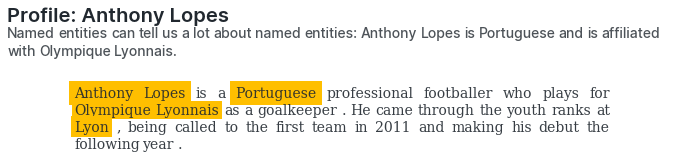

In [6]:
from multiplex import drawable
drawable = importlib.reload(drawable)

plt.style.use(os.path.join(sys.path[0], '..', 'styles', "multiplex.style"))
viz = drawable.Drawable(plt.figure(figsize=(12,1.25)))

viz.draw_text_annotation(tokens, align='justify',
                         fontfamily='serif', alpha=0.9,
                         lineheight=1.25, lpad=0.1, rpad=0.1)

viz.set_title('Profile: Anthony Lopes', loc='left')
viz.set_caption('Named entities can tell us a lot about named entities: \
                 Anthony Lopes is Portuguese and is affiliated with Olympique Lyonnais.')
plt.savefig('exports/2-text-annotation.png', dpi=300, bbox_inches='tight')

Let's say that we want to do more with the text: we want to tag it and highlight the different parts-of-speech tags. We can highlight the different parts of speech just like we highlighted named entities. However, since there are multiple parts-of-speech tags that we want to highlight, we want our readers to be able to tell them apart.

Multiplex can create a legend if labels are given. The legend labels are drawn next to the line where they first appear to help readers interpret the text better. In this example, we'll highlight three different parts-of-speech tags: verbs, nouns and adjectives.

We create dictionaries similarly to before: if the token is a verb, a noun or an adjective, we set its styling and text. This time, we also give these classes a label.

In [7]:
tokens = nltk.word_tokenize(paragraph)
pos_tags = nltk.pos_tag(tokens)

tokens = []
for text, pos in pos_tags:
    if pos.startswith('N'):
        tokens.append({
            'label': 'Noun',
            'style': { 'facecolor': '#FFBF00' },
            'text': text,
        })
    elif pos.startswith('V'):
        tokens.append({
            'label': 'Verb',
            'style': { 'facecolor': '#1DD300' },
            'text': text,
        })
    elif pos.startswith('JJ'):
        tokens.append({
            'label': 'Adjective',
            'style': { 'facecolor': '#009E8D' },
            'text': text,
        })
    else:
        tokens.append(text)

This time, nothing changes in the way we call the `draw_text_annotation` function. The function automatically notices the labels and creates a legend out of them. You can suppress the legend by passing `with_legend=False` to the `draw_text_annotation` function.

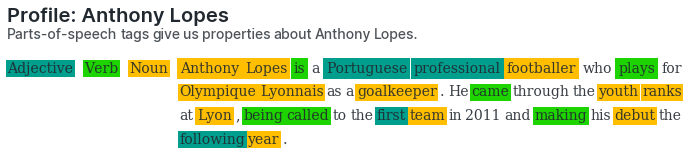

In [8]:
from multiplex import drawable
drawable = importlib.reload(drawable)

plt.style.use(os.path.join(sys.path[0], '..', 'styles', "multiplex.style"))
viz = drawable.Drawable(plt.figure(figsize=(10, 1.75)))

viz.draw_text_annotation(tokens, align='justify',
                         fontfamily='serif', alpha=0.9,
                         lineheight=1.25, rpad=0.1)

viz.set_title('Profile: Anthony Lopes', loc='left')
viz.set_caption('Parts-of-speech tags give us properties about Anthony Lopes.')
plt.show()

You can learn more about text visualizations, including functionality that was not covered in this tutorial, on [Multiplex's documentation site](https://nicholasmamo.github.io/multiplex-plot/text.html). You can continue learning about Multiplex in the [time series tutorial](https://github.com/NicholasMamo/multiplex-plot/blob/master/examples/3.%20Time%20Series.ipynb).